In [1]:
"""
Created on Apr 17 2023

@author: rodrigo pena
"""

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['savefig.dpi'] = 120
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

torch.manual_seed(0)

import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU


In [2]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,D_out)
        
    def forward(self,x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

class Net_relu(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net_relu,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,D_out)
        
    def forward(self,x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x
    
class Net_sigmoid(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net_sigmoid,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,D_out)
        
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x    

In [3]:
acc = []
for m in [1]:

    data_cxy = np.loadtxt("nl_signal_yrand2.dat").astype(np.float32)
    label_cxy = np.loadtxt("nl_lbs_yrand2.dat").astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)

    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.001
    H=10

    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()

    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:    
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)

    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)
    epochs = 2000

    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()
            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    train_model(epochs)

    acc.append(accuracy_list[-1])

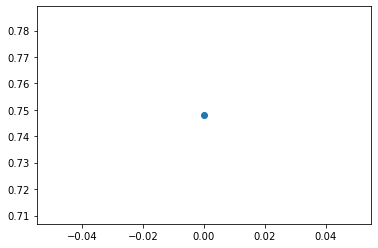

In [4]:
plt.plot(acc,'o')

In [7]:
acc antigo

[0.732]

In [5]:
acc

[0.748]

In [6]:
acc = []
for m in [1]:

    data_cxy = np.loadtxt("nfbl_vs_nfbl_signal_yrand2.dat").astype(np.float32)
    label_cxy = np.loadtxt("nfbl_vs_nfbl_lbs_yrand2.dat").astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)

    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.001
    H=10

    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()

    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:    
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)

    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)
    epochs = 2000

    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()
            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    train_model(epochs)

    acc.append(accuracy_list[-1])

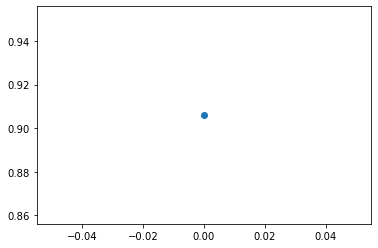

In [7]:
plt.plot(acc,'o')

In [10]:
acc antigo

[0.882]

In [8]:
acc

[0.906]

In [11]:
np.mean(acc)

0.882

In [9]:
acc = []
for m in [1]:

    data_cxy = np.loadtxt("iffl_vs_iffl_signal_yrand2.dat").astype(np.float32)
    label_cxy = np.loadtxt("iffl_vs_iffl_lbs_yrand2.dat").astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)

    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.001
    H=10

    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()

    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:    
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)

    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)
    epochs = 1000

    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()
            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    train_model(epochs)

    acc.append(accuracy_list[-1])

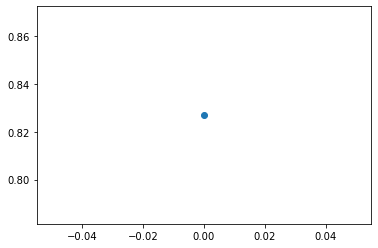

In [10]:
plt.plot(acc,'o')

In [28]:
acc antigo

[0.69]

In [11]:
acc

[0.827]

In [29]:
np.mean(acc)

0.69

In [25]:
data_cxy

tensor([[ 2.0842, 10.5700,  1.6217,  ...,  1.8514, 16.5800,  0.5295],
        [ 2.0911,  6.9400,  1.6827,  ...,  1.8862, 15.6400,  0.1956],
        [ 1.2777,  4.7900,  1.0934,  ...,  1.1838, 24.2800,  0.3637],
        ...,
        [ 1.3858,  3.9400,  1.0678,  ...,  1.2253, 11.1800,  0.2861],
        [ 2.1047,  7.1600,  1.7254,  ...,  1.9243, 12.5600,  0.2502],
        [ 2.1039, 10.2600,  1.6725,  ...,  1.8870, 15.5300,  0.1122]])